<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Trabalho_FInal_ML_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Acessar Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importar dados
import pandas as pd
MArvelDC= pd.read_csv("/content/drive/My Drive/PROJ/dados/marvel-vs-dc.csv")
MArvelDC


,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,OpeningWeekendUSA,GrossUSA,GrossWorldwide
0,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [0]:
# atraves dessa  matriz de correlação podemos afirmar que o lucro bruto(USD) tem um correção muito forte 
# com Budget (cpital investido no filme) e com o sucesso de bilheria no estreia do filme nos EUA  e no mundo
MArvelDC.corr()

,Rate,Metascore,Minutes,Release,Budget,OpeningWeekendUSA,GrossUSA,GrossWorldwide
Rate,1.000000,0.252400,0.145552,0.351983,0.055983,0.185008,0.108177,0.187788
Metascore,0.252400,1.000000,0.509780,0.232213,0.242570,0.425888,0.575244,0.450119
Minutes,0.145552,0.509780,1.000000,0.138387,0.638160,0.637006,0.630699,0.603935
Release,0.351983,0.232213,0.138387,1.000000,0.204316,0.433480,0.449439,0.552735
Budget,0.055983,0.242570,0.638160,0.204316,1.000000,0.741009,0.631972,0.656332
OpeningWeekendUSA,0.185008,0.425888,0.637006,0.433480,0.741009,1.000000,0.935783,0.933075
GrossUSA,0.108177,0.575244,0.630699,0.449439,0.631972,0.935783,1.000000,0.939677
GrossWorldwide,0.187788,0.450119,0.603935,0.552735,0.656332,0.933075,0.939677,1.000000


In [0]:
mediaAvaliacaoTempoFilme= MArvelDC.groupby('Rate').mean()['Minutes']
print(mediaAvaliacaoTempoFilme)

Rate
3.3    104.000000
4.7     81.000000
5.5    114.000000
6.0    138.500000
6.4    120.000000
6.5    151.000000
6.7    112.000000
6.9    119.666667
7.0    127.333333
7.1    131.000000
7.2    130.000000
7.3    130.666667
7.4    137.000000
7.5    115.000000
7.6    142.333333
7.7    136.000000
7.8    147.000000
7.9    128.000000
8.0    132.000000
8.2    140.000000
8.4    164.000000
8.5    165.000000
8.7    122.000000
9.0    152.000000
Name: Minutes, dtype: float64


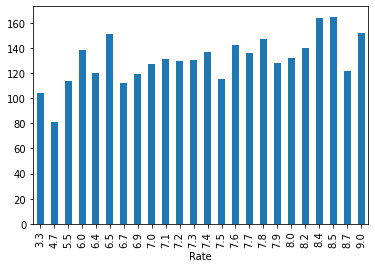

In [0]:
# podemos perceber que nos maiores rates, tem uma duração maior e acaba agradando mais o publico desse tipo de filme
mediaAvaliacaoTempoFilme.plot.bar()

In [0]:
#cosolidar dados  do Budget  da DC e devolver por ano
#podemos afimar  que 2010  foi o ano em que a DC recebeu o menor vavalor de Budget 
mediaBudgetcaoDC  = MArvelDC[MArvelDC['Company'] == 'DC' ].groupby('Release').mean()['Budget']
print(mediaBudgetcaoDC)

Release
2004    100000000.0
2005    150000000.0
2006    270000000.0
2008    185000000.0
2009    130000000.0
2010     47000000.0
2011    200000000.0
2012    250000000.0
2013    225000000.0
2016    212500000.0
2017    224500000.0
2018    160000000.0
2019     77500000.0
Name: Budget, dtype: float64


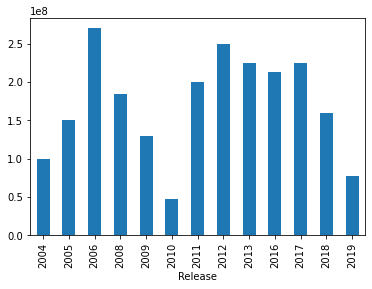

In [0]:
#atraves desse grafico de barras, podemos afirmar que nos ultimos 15 anos 
#o investimento em filmes da DC tem ocilado bastante com uma queda nos ultimos 3 anos.
mediaBudgetcaoDC.plot.bar()

In [0]:
#cosolidar de Budget da Marvel e Consolidar por ano
#podemos afirmar que o investimento em filmes da Marvel não vem sofrendo ocialações significaivas
# sendo que no ano de 2019 foi o ano com maior budget recebido nos ultomos 15 anos
  = MArvelDC[MArvelDC['Company'] == 'Marvel' ].groupby('Release').mean()['Budget']
print(mediaBudgetMarvel)

Release
2008    1.450000e+08
2010    2.000000e+08
2011    1.450000e+08
2012    2.200000e+08
2013    1.850000e+08
2014    1.700000e+08
2015    1.900000e+08
2016    2.075000e+08
2017    1.850000e+08
2018    2.276667e+08
2019    2.303333e+08
Name: Budget, dtype: float64


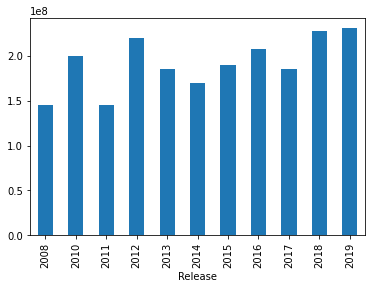

In [0]:
#atraves desse grafico de barras, podemos verficar que nos ultimos anos o inverstimento em filmes da Marvel está subindo
mediaBudgetMarvel.plot.bar()

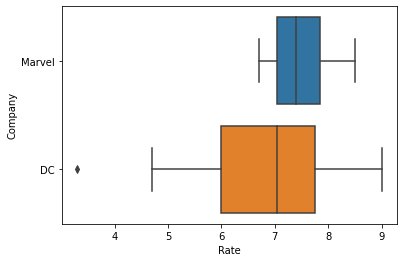

In [0]:
# Analisando o boxplot veirifcamos a variação de notas dadas aos filmes da Marvel 
# é menor sendo a mesma a detentoda das melhores avaliações
# Nas avaliaçãoes da DC Conseguimos peceber uma distribuição maior contendo outlier para baixo
#numa media geral os filmes da Marvel acabam agradando o publico do que os filmes da DC
import seaborn as sns
sns.boxplot(x='Rate' , y='Company', data=MArvelDC)

In [0]:
# atraves a regrassão linear vamos treinar o modelo o utilizando as variavies Budget e GrossUSA 
# poderemos obter os coeficientes para prever a bilheteria da primeira senana
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(MArvelDC[[ 'Budget','GrossUSA']], MArvelDC['OpeningWeekendUSA'])
print(reglin.coef_, reglin.intercept_)

[0.26557729 0.29576365] -29393997.627610967


In [0]:
def prever_OpeningWeekendUSA(Budget, GrossUSA):
    ownusa = Budget * 0.26557729  + GrossUSA * 0.29576365 - -29393997.627610967
    return ownusa
print(prever_OpeningWeekendUSA(140000000,318604126))

160806337.43843085


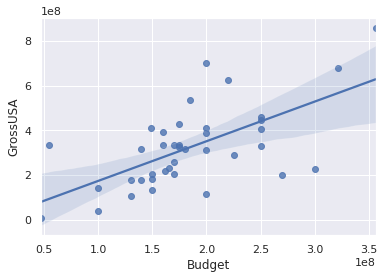

In [0]:
#visualização gráfica do regressão linear
import seaborn as sns
sns.regplot(x="Budget", y="GrossUSA", data=MArvelDC);

kmeans

In [0]:
#Selecionar coluas mas relevantes para analise de Kmeans
MArvelDC2= MArvelDC[['Budget','GrossUSA']]
MArvelDC2

,Budget,GrossUSA
0,140000000,318604126
1,150000000,134806913
2,200000000,312433331
3,150000000,181030624
4,140000000,176654505
5,220000000,623357910
6,200000000,409013994
7,170000000,206362140
8,170000000,259766572
9,170000000,333176600


In [0]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=5) 
k.fit(MArvelDC2) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

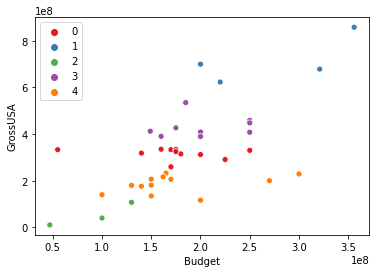

In [0]:
# Podemos afimar analisando o grafico abaixo que quando maior i investimento (Budget) maior
# é o retorno bruto (GrossUSA) sedo que a  valor de investimento gira em media de USD 200.000.000,00
# com retorno aproximado de 350.000.000,00.
import seaborn as sns
#as variaveis são as mais relevantes Budget GrossUSA
sns.scatterplot(MArvelDC2['Budget'], MArvelDC2['GrossUSA'], hue=k.labels_,palette=sns.color_palette('Set1',5))

In [0]:
#Selecionar coluas mas relevantes para analise de Kmeans
MArvelDC3= MArvelDC[['Budget','GrossWorldwide']]
MArvelDC3

,Budget,GrossWorldwide
0,140000000,585366247
1,150000000,263427551
2,200000000,623933331
3,150000000,449326618
4,140000000,370569774
5,220000000,1518812988
6,200000000,1214811252
7,170000000,644783140
8,170000000,714421503
9,170000000,772776600


In [0]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=5) 
k.fit(MArvelDC3) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

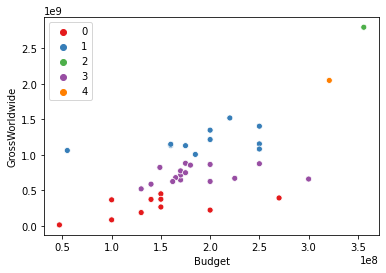

In [0]:
# Podemos afimar analisando o grafico abaixo que quando maior o investimento (Budget) maior
# é o retorno bruto no mundo (GrossWorldwide) sedo que a  valor de investimento gira em media de USD 200.000.000,00
# com retorno aproximado de USD 1.000.000.000,00.
import seaborn as sns
#as variaveis são as mais relevantes Budget GrossWorldwide
sns.scatterplot(MArvelDC3['Budget'], MArvelDC3['GrossWorldwide'], hue=k.labels_,palette=sns.color_palette('Set1',5))